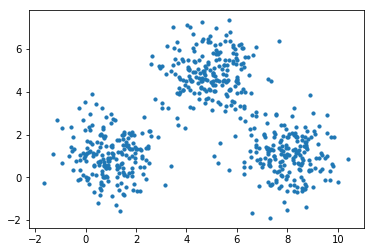

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import pandas as pd
center_1=([1,1])
center_2=([5,5])
center_3=([8,1])
np.random.seed(1001)
dat_1=np.random.randn(200,2)+center_1
dat_2=np.random.randn(200,2)+center_2
dat_3=np.random.randn(200,2)+center_3
data=np.concatenate((dat_1,dat_2,dat_3))
plt.scatter(data[:,0],data[:,1],s=10)



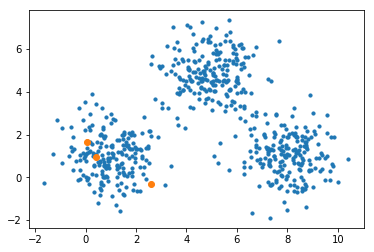

In [7]:
mean=np.mean(data)
std=np.std(data)
k=3
n=data.shape[0]
c=data.shape[1]
np.random.seed(1001)
centers=np.random.randn(k,c)*std+mean
plt.scatter(data[:,0],data[:,1],s=10)
plt.scatter(centers[:,0],centers[:,1])


In [11]:
for i in range(500):
    change_center=centers.reshape(3,1,2)
    dist=(data-change_center)**2
    new_dist=np.sum(dist,axis=2)
    eq_dist=np.sqrt(new_dist)
    eq_dist=eq_dist.reshape(3,600,1)
    clusters=np.argmin(eq_dist,axis=0)
    nc=clusters.reshape(600)
    new_clusters=pd.get_dummies(nc)
    label=np.array(new_clusters)
    new_label=label.T


    label_s=np.sum(label,axis=0)
    label_sum=label_s.reshape(3,1)
    new_label=new_label.reshape(3,600,1)
    new_xy=data*new_label
    mean_value=np.sum(new_xy,axis=1)
    new_mean=mean_value/label_sum
    centers=new_mean
    
print("********")
print(new_mean)


********
[[0.98002068 0.98801966]
 [7.98206088 1.01853184]
 [4.94532943 4.88964006]]


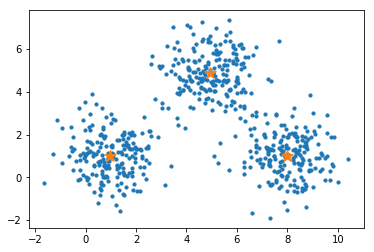

In [15]:
plt.scatter(data[:,0],data[:,1],s=10)
plt.scatter(new_mean[:,0],new_mean[:,1],marker='*',s=150)
